# Flight Price Prediction

In [1]:
#-----------------------------------------------------------------------------------
# Author: Pramodkumar Gupta
# Project: Flight Price Prediction  
#
#-----------------------------------------------------------------------------------

# Import All Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

# Read Data

In [2]:
df_train=pd.read_excel('Train_set.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

# Data Overview

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_test.shape

(2671, 10)

In [7]:
df_comb=df_train.append(df_test, sort=False)

In [8]:
df_comb.shape

(13354, 11)

In [9]:
df_comb.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Feature Engineering

In [10]:
# Handling Date_of_Journey

df_comb['DOJ_Day'] = df_comb['Date_of_Journey'].str.split('/').str[0].astype(int)
df_comb['DOJ_Month'] = df_comb['Date_of_Journey'].str.split('/').str[1].astype(int)
df_comb['DOJ_Year'] = df_comb['Date_of_Journey'].str.split('/').str[2].astype(int)

# Dropping Original Column
df_comb.drop(['Date_of_Journey'],axis=1,inplace=True)
df_comb

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [11]:
# Check for Null values
df_comb.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
DOJ_Day               0
DOJ_Month             0
DOJ_Year              0
dtype: int64

In [12]:
df_comb['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [13]:
# handle Total_Stops
df_comb['Total_Stops']=df_comb['Total_Stops'].fillna(0)

df_comb.Total_Stops=df_comb.Total_Stops.replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4}).astype(int)

df_comb

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,NaN,6,3,2019


In [14]:
df_comb.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
DOJ_Day              int32
DOJ_Month            int32
DOJ_Year             int32
dtype: object

In [15]:
# Handle Arrival_Time
df_comb['Arrival_Time'] = df_comb['Arrival_Time'].str.split(' ').str[0]
df_comb['Arrival_hour'] = df_comb['Arrival_Time'].str.split(':').str[0].astype(int)
df_comb['Arrival_min'] = df_comb['Arrival_Time'].str.split(':').str[1].astype(int)

df_comb.drop(['Arrival_Time'], axis=1, inplace=True)

df_comb

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1,No info,NaN,6,6,2019,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,0,No info,NaN,27,3,2019,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1,No info,NaN,6,3,2019,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1,No info,NaN,6,3,2019,19,15


In [16]:
# Handle Dep_Time
df_comb['Dep_hour'] = df_comb['Dep_Time'].str.split(':').str[0].astype(int)
df_comb['Dep_min'] = df_comb['Dep_Time'].str.split(':').str[1].astype(int)

df_comb.drop(['Dep_Time'], axis=1, inplace=True)

df_comb

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1,No info,NaN,6,3,2019,19,15,4,0


In [17]:
# Handle Route
df_comb['Route_1'] = df_comb['Route'].str.split('→ ').str[0]
df_comb['Route_2'] = df_comb['Route'].str.split('→ ').str[1]
df_comb['Route_3'] = df_comb['Route'].str.split('→ ').str[2]
df_comb['Route_4'] = df_comb['Route'].str.split('→ ').str[3]
df_comb['Route_5'] = df_comb['Route'].str.split('→ ').str[4]
df_comb['Route_6'] = df_comb['Route'].str.split('→ ').str[5]

df_comb.drop(['Route'], axis=1, inplace=True)

df_comb

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1,No info,NaN,6,6,2019,20,25,20,30,CCU,DEL,BLR,NaN,NaN,NaN
2667,IndiGo,Kolkata,Banglore,2h 35m,0,No info,NaN,27,3,2019,16,55,14,20,CCU,BLR,NaN,NaN,NaN,NaN
2668,Jet Airways,Delhi,Cochin,6h 35m,1,No info,NaN,6,3,2019,4,25,21,50,DEL,BOM,COK,NaN,NaN,NaN
2669,Air India,Delhi,Cochin,15h 15m,1,No info,NaN,6,3,2019,19,15,4,0,DEL,BOM,COK,NaN,NaN,NaN


In [18]:
# Handling Missing values

df_comb['Price'] = df_comb['Price'].fillna(df_comb['Price'].mean())

for cat in ['Route_1','Route_2','Route_3','Route_4','Route_5','Route_6']: 
    df_comb[cat] = df_comb[cat].fillna('None')
    
df_comb    

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.000000,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.000000,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.000000,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.000000,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.000000,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1,No info,9087.064121,6,6,2019,20,25,20,30,CCU,DEL,BLR,None,None,None
2667,IndiGo,Kolkata,Banglore,2h 35m,0,No info,9087.064121,27,3,2019,16,55,14,20,CCU,BLR,None,None,None,None
2668,Jet Airways,Delhi,Cochin,6h 35m,1,No info,9087.064121,6,3,2019,4,25,21,50,DEL,BOM,COK,None,None,None
2669,Air India,Delhi,Cochin,15h 15m,1,No info,9087.064121,6,3,2019,19,15,4,0,DEL,BOM,COK,None,None,None


In [19]:
# Check for missing values

df_comb.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
DOJ_Day            0
DOJ_Month          0
DOJ_Year           0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

In [20]:
# Handle Duration
df_comb['Duration']=df_comb['Duration'].fillna(0)
df_comb['Duration']=df_comb['Duration'].replace({'5m':'0h 5m'})
df_comb['Duration_hour'] = df_comb['Duration'].str.split('h').str[0].astype(int)
df_comb['Duration_min'] = df_comb['Duration'].str.split(' ').str[1].fillna('0m')
df_comb['Duration_min'] = df_comb['Duration_min'].str.split('m').str[0].astype(int)
df_comb.drop(['Duration'], axis=1, inplace=True)
df_comb

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.000000,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,None,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.000000,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,None,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.000000,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,None,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218.000000,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,None,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.000000,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,None,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,9087.064121,6,6,2019,20,25,20,30,CCU,DEL,BLR,None,None,None,23,55
2667,IndiGo,Kolkata,Banglore,0,No info,9087.064121,27,3,2019,16,55,14,20,CCU,BLR,None,None,None,None,2,35
2668,Jet Airways,Delhi,Cochin,1,No info,9087.064121,6,3,2019,4,25,21,50,DEL,BOM,COK,None,None,None,6,35
2669,Air India,Delhi,Cochin,1,No info,9087.064121,6,3,2019,19,15,4,0,DEL,BOM,COK,None,None,None,15,15


In [21]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

cat_le=['Airline','Source','Destination','Additional_Info','Route_1','Route_2','Route_3','Route_4','Route_5','Route_6']

for x in cat_le: 
    df_comb[x] = le.fit_transform(df_comb[x])
    
df_comb    

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DOJ_Day,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Duration_hour,Duration_min
0,3,0,5,0,8,3897.000000,24,3,2019,1,10,22,20,0,13,24,12,4,1,2,50
1,1,3,0,2,8,7662.000000,1,5,2019,13,15,5,50,2,25,1,3,4,1,7,25
2,4,2,1,2,8,13882.000000,9,6,2019,4,25,9,25,3,32,4,5,4,1,19,0
3,3,3,0,1,8,6218.000000,12,5,2019,23,30,18,5,2,34,3,12,4,1,5,25
4,3,0,5,1,8,13302.000000,1,3,2019,21,35,16,50,0,34,8,12,4,1,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,8,9087.064121,6,6,2019,20,25,20,30,2,14,3,12,4,1,23,55
2667,3,3,0,0,8,9087.064121,27,3,2019,16,55,14,20,2,5,24,12,4,1,2,35
2668,4,2,1,1,8,9087.064121,6,3,2019,4,25,21,50,3,7,6,12,4,1,6,35
2669,1,2,1,1,8,9087.064121,6,3,2019,19,15,4,0,3,7,6,12,4,1,15,15


In [25]:
# Split Train and Test set

df_train=df_comb[0:10683]
df_test=df_comb[10683:]

In [26]:
X=df_train.drop(['Price'], axis=1)
y=df_train['Price']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# Feature Selection

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [32]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [33]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [37]:
selected_features=X.columns[(model.get_support())]

In [39]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [40]:
X_train

,Airline,Source,Destination,Total_Stops,Additional_Info,DOJ_Day,DOJ_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hour,Duration_min
7106,8,0,2,0,8,6,4,8,35,5,55,0,13,24,12,4,2,40
7904,1,2,1,1,8,1,6,6,50,5,15,3,41,6,12,4,25,35
4861,4,2,1,2,5,12,6,12,35,14,35,3,34,4,5,4,22,0
9375,3,2,1,1,8,15,6,21,0,6,40,3,7,6,12,4,14,20
155,1,3,0,2,8,9,5,7,55,8,20,2,28,4,3,4,23,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,3,0,1,5,12,6,4,40,6,30,2,7,3,12,4,22,10
4859,1,2,1,2,8,9,6,19,15,22,0,3,16,4,5,4,21,15
3264,4,2,1,1,8,3,3,4,25,8,0,3,7,6,12,4,20,25
9845,4,2,1,1,5,18,5,12,35,11,30,3,7,6,12,4,25,5


# Machine Learning Model Implementation

In [43]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.5s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   9.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.8s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   6.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   6.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.1s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   4.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.6s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 15.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [46]:
import pickle

# -------------------- Writing Model to pickle -----------------------------
# open a file, where you ant to store the data
file = open('FlightPricePredictionModel.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [47]:
y_pred=rf_random.predict(X_test)

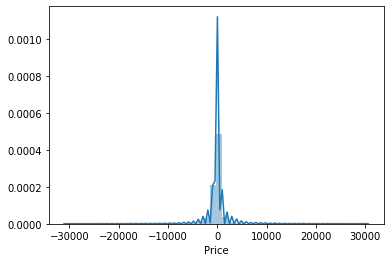

In [48]:
import seaborn as sns

sns.distplot(y_test-y_pred)

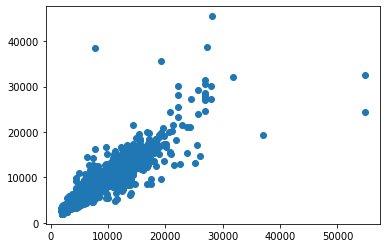

In [49]:
plt.scatter(y_test,y_pred)

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 707.0528675350341
MSE: 2676805.362840034
RMSE: 1636.0945458133017
